<a href="https://colab.research.google.com/gist/AnastasiiadeO/47ccab5ce24b5626e29de89b27bc8157/intraducao-data-science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Новый раздел

#Notas em geral

In [1]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape


(100836, 4)

In [3]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [5]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas["nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
print("Media ", notas.nota.mean())
print("Mediana ", notas.nota.median())

Media  3.501556983616962
Mediana  3.5


<Axes: ylabel='Frequency'>

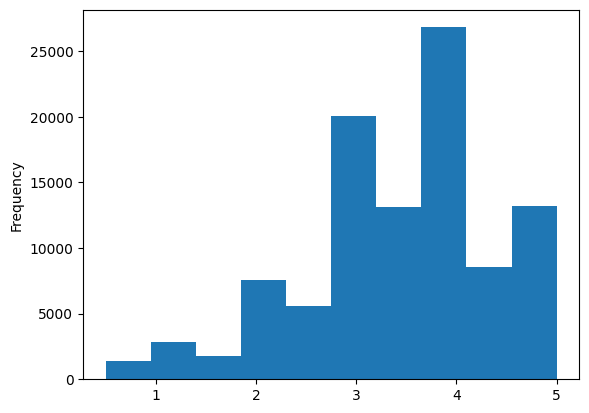

In [8]:
notas.nota.plot(kind = 'hist')

In [9]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: >

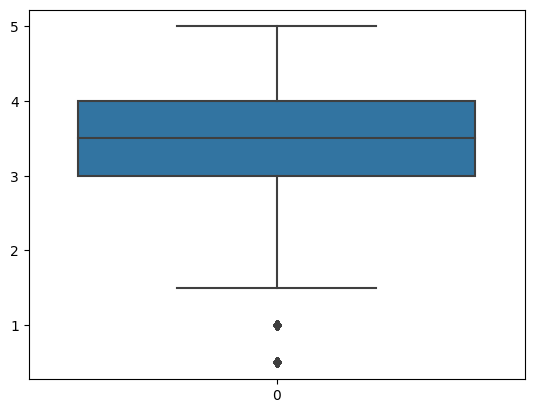

In [10]:
import seaborn as sns

sns.boxplot(notas.nota)

#Olhando os filmes

In [11]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
notas.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


# Analisando algumas notas espicificas por filme

In [13]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

agrupando as notas pelo filme e pegando media

In [14]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

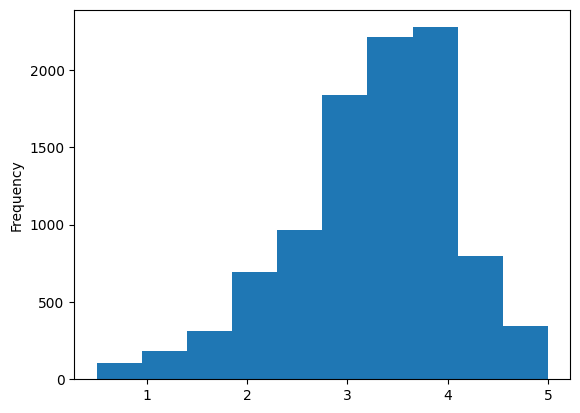

In [15]:
medias_por_filme.plot(kind = 'hist')

<Axes: ylabel='nota'>

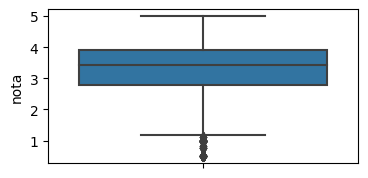

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
sns.boxplot(y=medias_por_filme)

In [17]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<ipython-input-18-c99e5fbcf4e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme)


<Axes: xlabel='nota', ylabel='Density'>

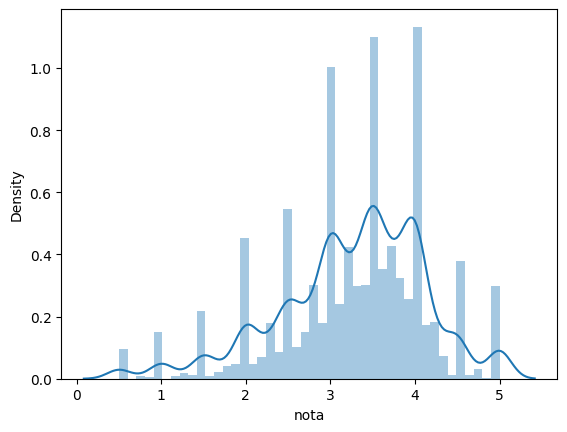

In [18]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das medias dos filmes')

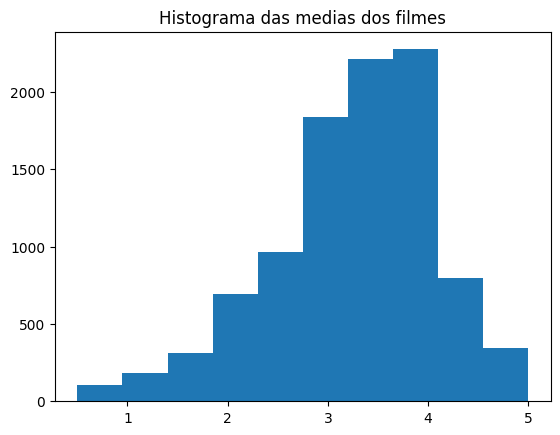

In [19]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das medias dos filmes")

In [20]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#Tipos de variaveis

In [21]:
tmdb.original_language.unique() #linguas => categorica nomenal
# primeiro grau < segundo grau <terceiro grau     =>     categorica ordinal
# buget(orcamento)  =>  quantitativa continuo (pode ser 0, 1, 500.50, 1000000, 0.96....)
# quantidade de votos => quantitativa intervalar (1,2,3,4,5 mas nao tem 2.7) ou (0.5,1,1.5,2,2.5... mas nao tem 3.3)

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [22]:
tmdb["original_language"].value_counts()
 #aqui so existe uma coluna mesmo que parece duas pq linguas viram indexes e quantidade sao valores dentro de uma coluna
 # tipo de variavel  => serie

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [23]:
#para criar duas colunas
contagem_de_linguas = tmdb["original_language"].value_counts().to_frame().reset_index() #variavel => data frame
#para renomear colunas
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

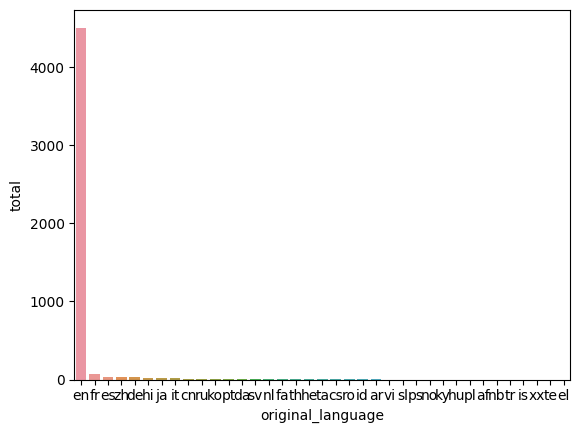

In [24]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_linguas)

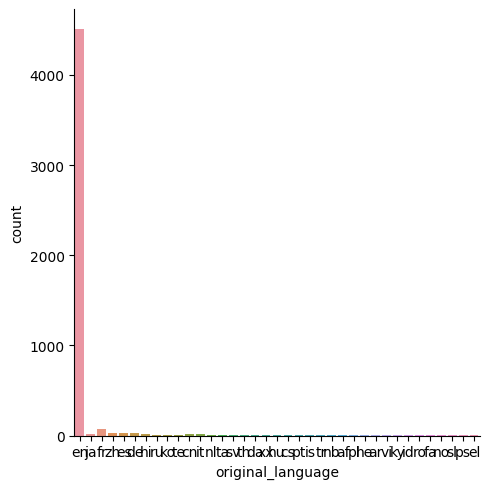

In [25]:
# fazer tudo issi com outro instrumento de seaborn e mais curto
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7eb524d5e890>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

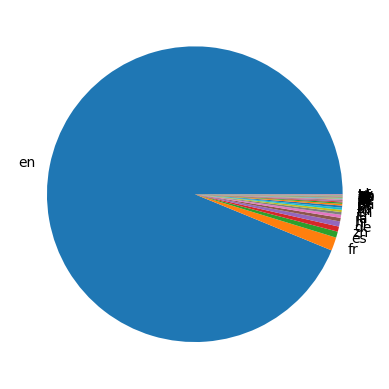

In [26]:
plt.pie(contagem_de_linguas["total"], labels = contagem_de_linguas["original_language"])

In [27]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_en = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_en
print(total_de_en, total_do_resto)

4505 298


In [28]:
dados = {
    'lingua':['ingles','outros'],
    'total':[total_de_en, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

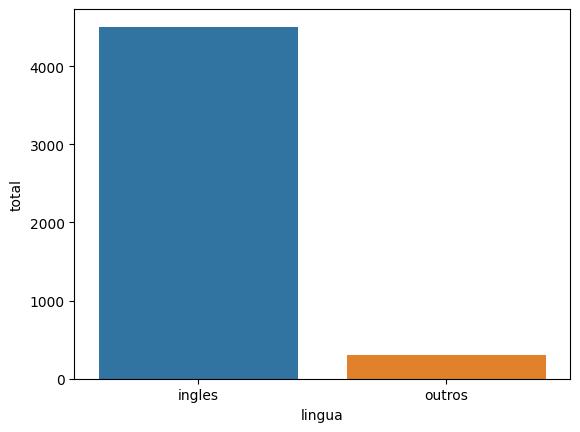

In [29]:
sns.barplot(x="lingua", y="total", data = dados)

In [30]:
total_por_lingua_sem_en = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_sem_en
# fr, es,zh ... sao indexes nesta tabela

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

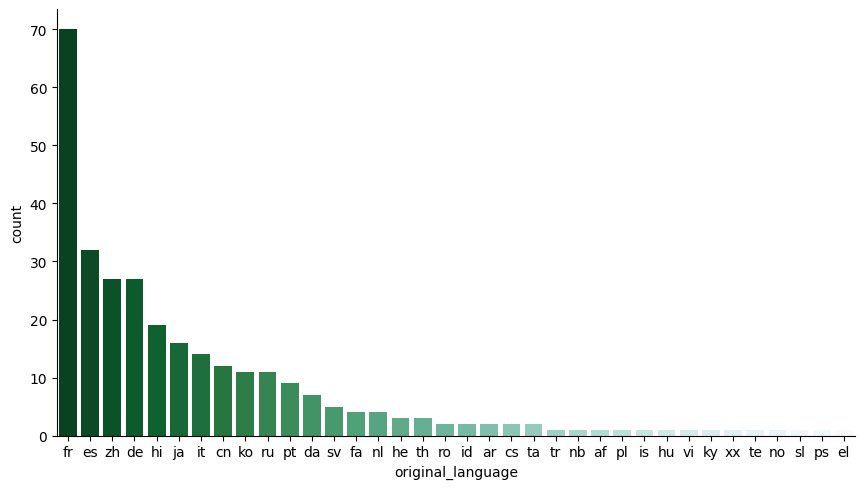

In [31]:
filmes_sem_en = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind = "count", data = filmes_sem_en, aspect=1.75,
            order = total_por_lingua_sem_en.index,
            palette = "BuGn_r")
#aspect x= (aspect)*y => (10,5)

##Revisando o papel da media, mediana, medidas da tendencia central, dispersao, desvio padrao, histograma, boxplot

In [36]:
notas_toy_story = notas.query("filmeId==1")
notas_jumanji = notas.query("filmeId==2")
print(len(notas_toy_story), len(notas_jumanji)) #quntidades das notas nos 2 filmes

215 110


In [44]:
print("nota media do filme Toy Story - %.2f" % notas_toy_story.nota.mean())
print("nota media do filme Jumanji - %.2f" % notas_jumanji.nota.mean())

nota media do filme Toy Story - 3.92
nota media do filme Jumanji - 3.43


In [45]:
print("nota mediana do filme Toy Story - %.2f" % notas_toy_story.nota.median())
print("nota mediana do filme Jumanji - %.2f" % notas_jumanji.nota.median())

nota mediana do filme Toy Story - 4.00
nota mediana do filme Jumanji - 3.50


In [46]:
import numpy as np
np.array([2.5]*10) #criando array com o mesmo numero varias veses

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [58]:
filme = np.append(np.array([2.5]*10), np.array([3.5]*6)) #juntando 2 arrays
np.std(filme) #standart deviation

0.4841229182759271

{'whiskers': [<matplotlib.lines.Line2D at 0x7eb519bb0a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb519bb0f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb519bb0790>,
 'medians': [<matplotlib.lines.Line2D at 0x7eb519bb14b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eb519bb1750>,
 'means': []}

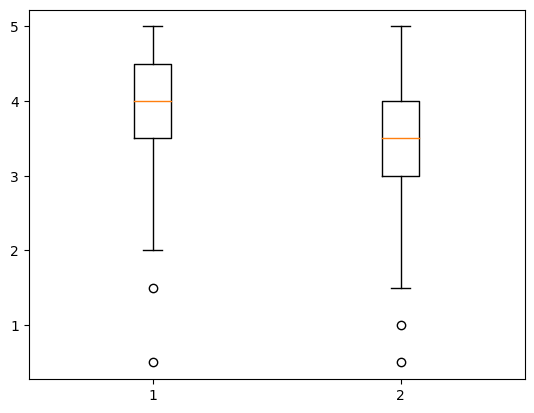

In [49]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

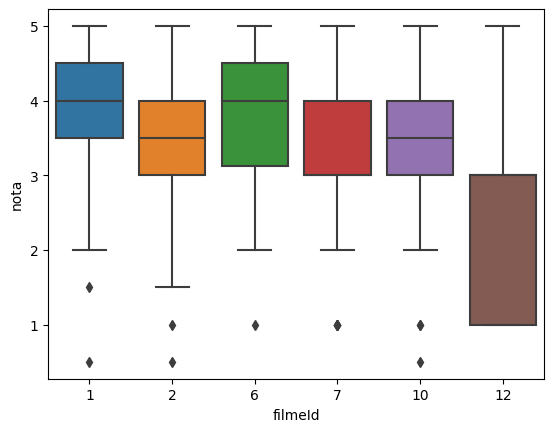

In [54]:
sns.boxplot(x ="filmeId", y="nota", data = notas.query("filmeId in [1,2,6,7,10,12]"))

In [55]:
#desvio padrao (standart deviation) - o quanto notas fojem de uma tendencia central(media)
print(notas_toy_story.nota.std(), notas_jumanji.nota.std())

0.8348591407114047 0.8817134921476455
